In [20]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score

In [5]:
iris = load_iris()
#Extraer los datos (medidas de las flores)
iris_data = iris.data

# Mostramos tabla con los datos
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # Establecemos correlación entre número de etiqueta y nombre de columnas
iris_data_pd



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


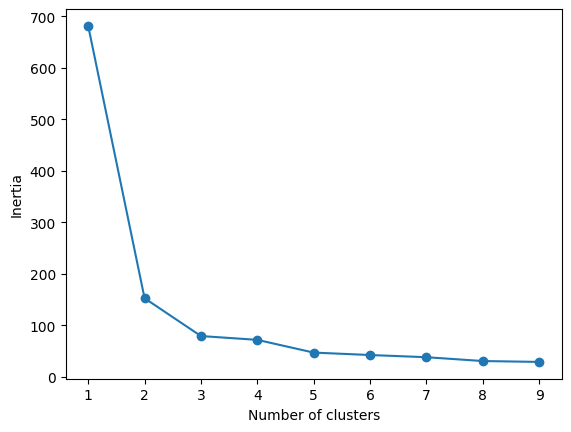

In [6]:
inertia = [] # Guardamos las inercias (desviaciones frente a los centroides)
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(iris_data);
  inertia.append(kmeans.inertia_)

# Graficamos las inercias
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# n_init=10 -> Se ejecuta 10 veces (centroides inicializados en posiciones diferentes) y devuelve el resultado con menor inercia
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(iris_data_pd.iloc[:,2:4]) # Utilizamos solo 2 dimensiones (longitud del pétalo - 2, ancho pétalo - 3)

labels = kmeans.labels_ # Etiquetas
centroids = kmeans.cluster_centers_ # Centros (finales) de los clusters
print(labels)
print(centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
[[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]


In [16]:
# Añadimos las etiquetas predichas al dataset
iris_data_pd['cluster_kmeans'] = labels
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_kmeans
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


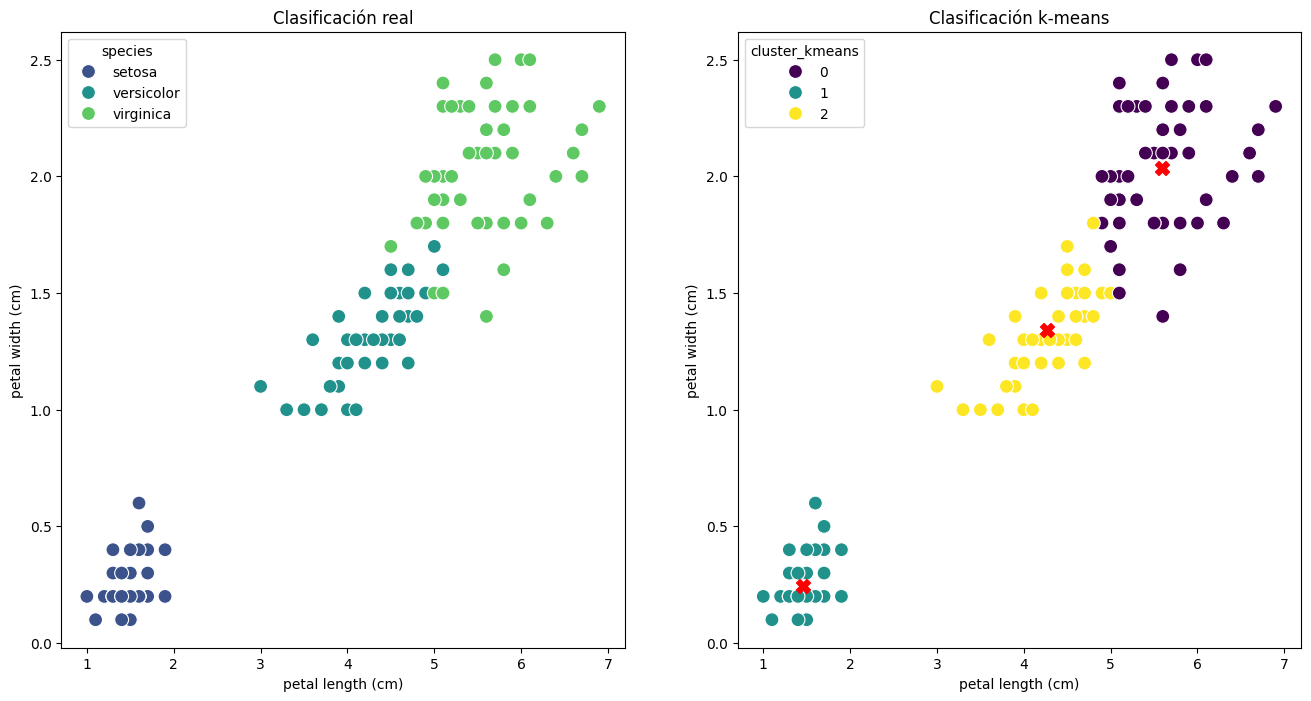

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='species', ax=axes[0], palette='viridis', s=100)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por k-means
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='cluster_kmeans', ax=axes[1], palette='viridis', s=100)
axes[1].set_title('Clasificación k-means')
axes[1].scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, label="Centroides")

plt.show()

In [28]:
# Matríz de confusión
contingency_matrix = pd.crosstab(iris.target, labels, rownames=['Clase Real'], colnames=['Clúster Predicho'])
print("\nTabla de Contingencia (Matriz de Confusión):")
print(contingency_matrix)


Tabla de Contingencia (Matriz de Confusión):
Clúster Predicho   0   1   2
Clase Real                  
0                  0  50   0
1                  2   0  48
2                 46   0   4


In [23]:
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# Compara qué tan similares son dos agrupaciones. 1.0 es una coincidencia perfecta.
ari = adjusted_rand_score(iris.target, labels)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.8857


In [33]:
# Mapeando los clusters generados por kmeans para que coincidan con las observaciones
y_pred_mapped = np.copy(labels)
y_pred_mapped[labels==1] = 0
y_pred_mapped[labels==0] = 2
y_pred_mapped[labels==2] = 1

contingency_matrix = pd.crosstab(iris.target, y_pred_mapped, rownames=['Clase Real'], colnames=['Clúster Predicho'])
print("\nTabla de Contingencia (Matriz de Confusión):")
print(contingency_matrix)


Tabla de Contingencia (Matriz de Confusión):
Clúster Predicho   0   1   2
Clase Real                  
0                 50   0   0
1                  0  48   2
2                  0   4  46


In [35]:
accuracy = accuracy_score(iris.target, y_pred_mapped)
print(f"Precisión (mapeando etiquetas): {accuracy:.4f} ({accuracy*100:.2f}%)")

Precisión (mapeando etiquetas): 0.9600 (96.00%)
